In [255]:
from contextlib import contextmanager

import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.patches import ConnectionPatch
from pandas.plotting._matplotlib.converter import get_datevalue

In [81]:
@contextmanager
def preserve_plot_limits(ax=None):
    """ Plot without modifying axis limits """
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    try:
        yield ax
    finally:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

<Axes: >

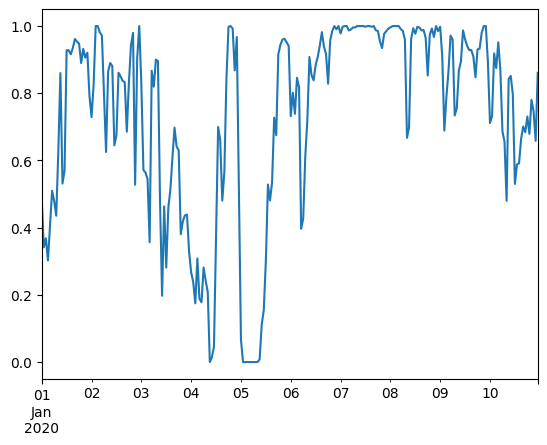

In [273]:
df_ttc = pd.read_csv("Durban_total_cloud_cover.csv")
ttc = pd.Series(data=df_ttc["cloud_cover"].values, index=pd.to_datetime(df_ttc["time"].values)) 
ttc["2020-01-01":"2020-01-10"].plot()

<Axes: >

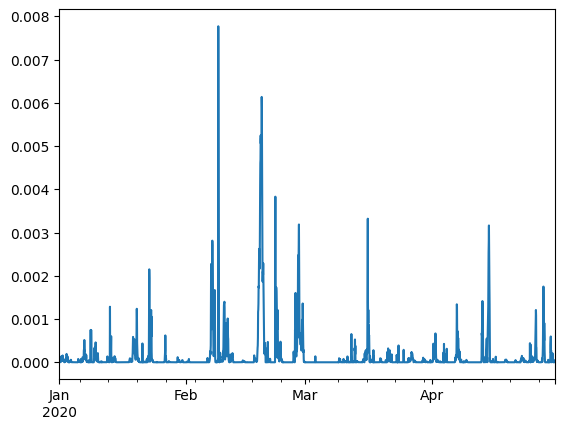

In [277]:
df_precip = pd.read_csv("Durban_total_precipitation.csv")
precip = pd.Series(data=df_precip["precipitation"].values, index=pd.to_datetime(df_precip["time"].values)) 
precip.loc["2020-01":"2020-04"].plot()

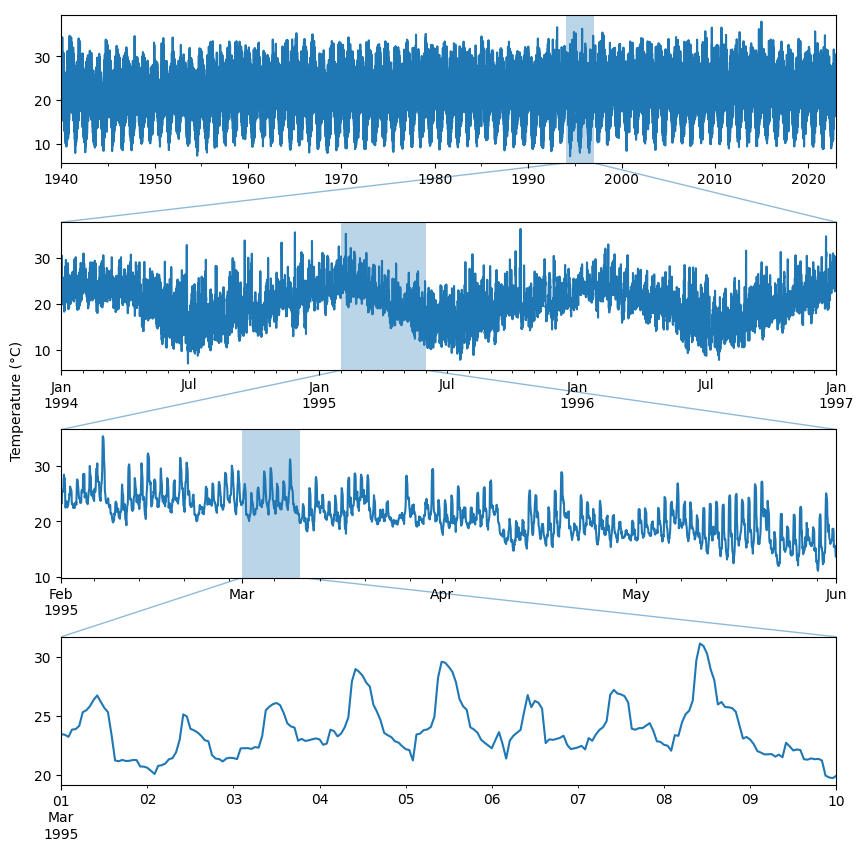

In [280]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(10, 10), nrows=4)

T.plot(ax=ax1)
T["1994-01-01 00:00:00":"1997-01-01 00:00:00"].plot(ax=ax2)
T["1995-02-01 00:00:00":"1995-06-01 00:00:00"].plot(ax=ax3)
T["1995-03-01 00:00:00":"1995-03-10 00:00:00"].plot(ax=ax4)

with preserve_plot_limits(ax1):
    ax1.fill_between(("1994-01-01 00:00:00", "1997-01-01 00:00:00"), -100, 100, alpha=0.3)

with preserve_plot_limits(ax2):
    ax2.fill_between(("1995-02-01 00:00:00", "1995-06-01 00:00:00"), -100, 100, alpha=0.3)

with preserve_plot_limits(ax3):
    ax3.fill_between(("1995-03-01 00:00:00", "1995-03-10 00:00:00"), -100, 100, alpha=0.3)

def pd_xaxis_value(dt):
    return get_datevalue(pd.Timestamp(dt), "h")

def add_zoom(fig, axA, axB, dt):
    fig.add_artist(
        ConnectionPatch(
            xyA=(pd_xaxis_value(dt), axA.get_ylim()[0]),
            xyB=(pd_xaxis_value(dt), axB.get_ylim()[1]),
            coordsA=axA.transData,
            coordsB=axB.transData,
            color="tab:blue",
            alpha=0.5,
            zorder=-1
        )
    )

add_zoom(fig, ax1, ax2, "1994-01-01 00:00:00")
add_zoom(fig, ax1, ax2, "1997-01-01 00:00:00")
add_zoom(fig, ax2, ax3, "1995-02-01 00:00:00")
add_zoom(fig, ax2, ax3, "1995-06-01 00:00:00")
add_zoom(fig, ax3, ax4, "1995-03-01 00:00:00")
add_zoom(fig, ax3, ax4, "1995-03-10 00:00:00")

plt.subplots_adjust(hspace=0.4)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor="none", which="both", top=False, bottom=False, left=False, right=False)
plt.ylabel("Temperature (°C)")

plt.show()

In [283]:
fig.savefig("zoom_plot_temperature_Durban.png", dpi=200)